In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
symbol = "AAPL"
start = "2010-01-01"
end = "2022-01-31"

df = yf.download(symbol, start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [ ]:
# "Adj close" adalah kependekan dari "adjusted close", yang berarti harga penutupan suatu saham yang telah disesuaikan dengan perubahan yang terjadi pada saham tersebut, seperti dividen atau pemecahan saham. Dalam istilah pasar saham, "adj close" sering digunakan sebagai acuan untuk mengukur kinerja historis suatu saham.

# Sementara itu, "close" hanya merujuk pada harga penutupan saham tanpa penyesuaian apapun. Istilah ini dapat digunakan untuk mengacu pada harga penutupan harian atau harga penutupan pada tanggal tertentu.

In [8]:
df = df.reset_index()

In [9]:
df = df.drop(['Date','Adj Close'], axis =1)

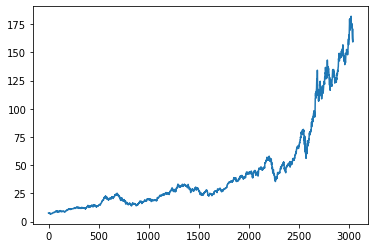

In [20]:
plt.plot(df.Close)
#showing close of apple stock

In [ ]:
# Moving average digunakan untuk menghilangkan fluktuasi harga jangka pendek dan membantu mengidentifikasi tren jangka panjang. 
# Para pedagang dan investor sering menggunakannya untuk menentukan level support dan resistance, 
# serta untuk memperkirakan potensi pembalikan harga.

In [21]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3035    158.0223
3036    158.0950
3037    158.1554
3038    158.2046
3039    158.3410
Name: Close, Length: 3040, dtype: float64

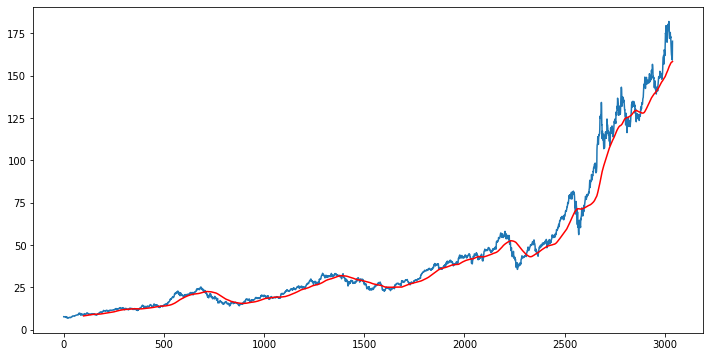

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [23]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3035    147.53270
3036    147.67540
3037    147.80170
3038    147.93765
3039    148.11680
Name: Close, Length: 3040, dtype: float64

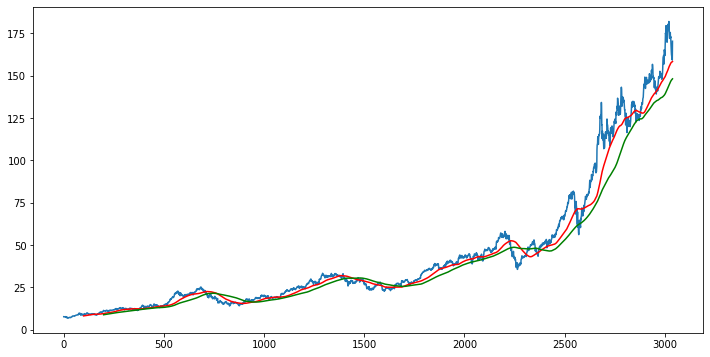

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [15]:
df.shape

(3040, 6)

In [48]:
df1 =df.copy()

# Modelling

In [163]:
from sklearn.model_selection import TimeSeriesSplit

# Split the data into training and testing sets using TimeSeriesSplit
X = df1[['Close']]
y = df1['Close']
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Use X_train, y_train for training and X_test, y_test for testing

In [179]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
data_training_array = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [165]:
data_training_array.shape

(2534, 1)

In [166]:
import numpy as np

# Define sliding window size
window_size = 100

# Create empty arrays to hold X_train and y_train
x_train = []
y_train = []

# Loop over the original dataset to create the new dataset
for i in range(window_size, len(data_training_array)):
    # Append the previous 100 days to X_train
    x_train.append(data_training_array[i-window_size:i])
    # Append the 101st day to y_train
    y_train.append(data_training_array[i])

# Convert X_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


This code is preparing data for a machine learning model that will be trained to predict the value of y_train given a sequence of input data X_train.

Here is what the code does:

Initializes two empty lists X_train and y_train.
A for loop is used to iterate over the indices from 100 to the length of X_train. This loop assumes that X_train has at least 100 elements. If X_train has fewer than 100 elements, this loop will not execute.
For each iteration of the loop, it appends a slice of the X_train list from index i-100 to index i to the X_train list. This slice has a length of 100 and represents the input sequence that the machine learning model will use to make predictions.
It also appends the first element of the i-th row of the X_train array to the y_train list. This value represents the target value that the machine learning model will try to predict given the corresponding input sequence in X_train.
After the loop, X_train and y_train are converted to NumPy arrays using the np.array() method.
This code is preparing a dataset for a machine learning model that will use a sliding window approach to generate input sequences and their corresponding target values. The model will use the input sequences to make predictions, and the target values will be used to train the model. This approach is commonly used in time series prediction tasks, where the order of the input data matters, and the past values can be used to predict future values.

Kode tersebut sedang mempersiapkan data untuk model machine learning yang akan dilatih untuk memprediksi nilai y_train berdasarkan urutan data masukan X_train.

Berikut adalah langkah-langkah yang dilakukan oleh kode tersebut:

Menginisialisasi dua list kosong X_train dan y_train.
Menggunakan loop for untuk mengulang dari indeks ke-100 sampai panjang dari X_train. Loop for ini mengasumsikan bahwa X_train memiliki setidaknya 100 elemen. Jika X_train memiliki kurang dari 100 elemen, loop for ini tidak akan dijalankan.
Untuk setiap iterasi dari loop, ia menambahkan irisan dari list X_train dari indeks i-100 hingga indeks i ke list X_train. Irisan ini memiliki panjang 100 dan mewakili urutan masukan yang akan digunakan oleh model machine learning untuk membuat prediksi.
Kode tersebut juga menambahkan elemen pertama dari baris ke-i dari array X_train ke list y_train. Nilai ini mewakili nilai target yang akan diprediksi oleh model machine learning yang sesuai dengan urutan masukan dalam X_train.
Setelah loop selesai, X_train dan y_train dikonversi menjadi array NumPy menggunakan metode np.array().
Kode tersebut sedang mempersiapkan dataset untuk model machine learning yang akan menggunakan pendekatan sliding window untuk menghasilkan urutan masukan dan nilai target yang sesuai. Model akan menggunakan urutan masukan untuk membuat prediksi, dan nilai target akan digunakan untuk melatih model. Pendekatan ini umum digunakan dalam tugas prediksi deret waktu, di mana urutan data masukan menjadi penting, dan nilai masa lalu dapat digunakan untuk memprediksi nilai masa depan.

In [ ]:
# ML Model 

In [ ]:
# Import the necessary modules: Sequential and Dense are two of the most important building blocks for creating neural networks in Keras.

# Create a Sequential model: This is the most basic type of model in Keras. It allows you to stack layers on top of each other, and it automatically connects the output of one layer to the input of the next.

# Add a Dense layer with 64 units: This layer will have a ReLU activation function, which means that any negative values will be set to zero. The input_dim argument specifies that the layer will expect a one-dimensional input. This layer is the first layer in the network.

# Add a second Dense layer with 1 unit: This layer has no activation function specified, which means it will output a raw score. This layer is the output layer in the network.

# Compile the model: This step is where you specify the optimizer, loss function, and any metrics you want to track during training. The adam optimizer is a popular choice for neural networks, and mean_squared_error is a common loss function for regression problems. mean_absolute_error is a metric that will be calculated during training and evaluation.

# Train the model: This step involves passing in the training data (X_train and y_train), specifying the number of epochs to run for, and the batch size. The validation_data argument is optional and allows you to track the model's performance on a separate set of data during training.

# Evaluate the model: After training is complete, the model's performance is evaluated on a separate set of data (X_test and y_test). The evaluate method returns the loss and mean absolute error (MAE) for the model's predictions.

# Print the MAE: The mean absolute error is printed to the console.

# Make predictions: Finally, the model is used to make predictions on the test data, and the results are stored in the predictions variable. These predictions can be used for further analysis or visualization.

In [167]:
x_train.shape

(2434, 100, 1)

In [168]:
# it means 100 timesteps and 1 feature dimension.

In [169]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [170]:
model=Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True,
              input_shape = (100,1))) # 100 represent index 1, number of column (just close, eventually if u want to predict 3 column u just put 3 )
model.add(Dropout(0.2))

model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(120, activation='relu')) # return sequences isn't needed it in here since we want to predict in here
model.add(Dropout(0.5))

model.add(Dense(1)) # To connect all these layer, 1 represent unit, we only want to predict 1 column that is closing price



In [171]:
model.summary()
# Simple Summary of my ML Model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_21 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_6 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_22 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_7 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_23 (LSTM)              (None, 120)              

In [172]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
77/77 [==============================] - 34s 365ms/step - loss: 0.0180 - mean_absolute_error: 0.0899
Epoch 2/50
77/77 [==============================] - 27s 348ms/step - loss: 0.0048 - mean_absolute_error: 0.0483
Epoch 3/50
77/77 [==============================] - 27s 349ms/step - loss: 0.0042 - mean_absolute_error: 0.0435
Epoch 4/50
77/77 [==============================] - 30s 381ms/step - loss: 0.0038 - mean_absolute_error: 0.0424
Epoch 5/50
77/77 [==============================] - 27s 348ms/step - loss: 0.0034 - mean_absolute_error: 0.0394
Epoch 6/50
77/77 [==============================] - 27s 348ms/step - loss: 0.0032 - mean_absolute_error: 0.0382
Epoch 7/50
77/77 [==============================] - 27s 347ms/step - loss: 0.0029 - mean_absolute_error: 0.0374
Epoch 8/50
77/77 [==============================] - 27s 349ms/step - loss: 0.0028 - mean_absolute_error: 0.0357
Epoch 9/50
77/77 [==============================] - 27s 349ms/step - loss: 0.0025 - mean_absolute_error:

In [190]:
model.save('keras_model.h5')

Predicting Values

Insert previous 100 data in X_test

In [174]:
X_test.head()
 #This are my testing data, but in order to predicting this values we need previous data.

,Close
2534,81.084999
2535,80.967499
2536,77.377502
2537,77.165001
2538,79.712502


In [175]:
X_train.tail(100) # Append this to data testing

,Close
2434,53.320000
2435,53.314999
2436,53.542500
2437,54.174999
2438,55.897499
...,...
2529,79.425003
2530,79.807503
2531,79.577499
2532,77.237503


In [176]:
past_100_days = X_train.tail(100)

In [177]:
final_df = past_100_days.append(X_test, ignore_index = True)
final_df

,Close
0,53.320000
1,53.314999
2,53.542500
3,54.174999
4,55.897499
...,...
601,161.619995
602,159.779999
603,159.690002
604,159.220001


In [181]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.88598491e-05],
       [0.00000000e+00],
       [1.76775262e-03],
       [6.68247125e-03],
       [2.00668289e-02],
       [1.90955401e-02],
       [1.06647610e-02],
       [1.28987132e-02],
       [1.44527811e-02],
       [1.84739307e-02],
       [1.49578703e-02],
       [8.68332368e-03],
       [1.06064860e-02],
       [8.58618888e-03],
       [1.50938353e-02],
       [1.28792981e-02],
       [1.08007557e-02],
       [2.08050178e-02],
       [2.20094063e-02],
       [1.10727153e-02],
       [1.46859106e-02],
       [2.67104403e-02],
       [2.68075751e-02],
       [2.16403119e-02],
       [2.67493001e-02],
       [3.26935824e-02],
       [4.45821767e-02],
       [4.39216779e-02],
       [4.28532840e-02],
       [4.10078117e-02],
       [4.27755643e-02],
       [4.49706863e-02],
       [5.29352362e-02],
       [5.18668423e-02],
       [5.81219145e-02],
       [5.88989632e-02],
       [6.47266957e-02],
       [6.95248644e-02],
       [5.83355992e-02],
       [5.82773242e-02],


In [182]:
input_data.shape

(606, 1)

In [185]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(506, 100, 1)
(506,)


In [186]:
# Making Prediction

y_predicted = model.predict(x_test)

16/16 [==============================] - 2s 94ms/step


In [187]:
y_predicted.shape

(506, 1)

In [188]:
y_test

array([0.21578151, 0.2148685 , 0.18697311, 0.18532191, 0.20511678,
       0.21016749, 0.21747154, 0.20740901, 0.2103617 , 0.2065931 ,
       0.22133731, 0.21681107, 0.21696651, 0.20540815, 0.21438285,
       0.20793348, 0.19384979, 0.16496368, 0.14534363, 0.15422122,
       0.11705971, 0.11674889, 0.16618751, 0.14775247, 0.17382182,
       0.15474576, 0.1471891 , 0.10278181, 0.14002099, 0.12077004,
       0.06793194, 0.1257042 , 0.05623764, 0.07692608, 0.06490152,
       0.06123005, 0.03104241, 0.02158204, 0.06530947, 0.06266757,
       0.08776567, 0.06698009, 0.0807141 , 0.07970395, 0.05371228,
       0.06152143, 0.05468357, 0.09559425, 0.0896888 , 0.10258754,
       0.10631726, 0.11653523, 0.14334278, 0.13825324, 0.14264348,
       0.13508682, 0.1236839 , 0.10705545, 0.12207159, 0.11999302,
       0.13541709, 0.13580563, 0.12688915, 0.14466378, 0.15645518,
       0.14726682, 0.15521196, 0.16375929, 0.16972301, 0.1757644 ,
       0.1881775 , 0.19765729, 0.190664  , 0.18335989, 0.18703

In [189]:
y_predicted

array([[0.22024083],
       [0.22165933],
       [0.22290246],
       [0.22392026],
       [0.22462279],
       [0.22504573],
       [0.22529605],
       [0.22553001],
       [0.22582398],
       [0.22622299],
       [0.22671822],
       [0.22735743],
       [0.22815281],
       [0.22909006],
       [0.23007004],
       [0.23103091],
       [0.23189363],
       [0.23251799],
       [0.23267317],
       [0.2321248 ],
       [0.23074707],
       [0.22847877],
       [0.22530116],
       [0.22147399],
       [0.21729966],
       [0.2131922 ],
       [0.20939723],
       [0.2060363 ],
       [0.20298871],
       [0.20022827],
       [0.19766876],
       [0.19503966],
       [0.19231024],
       [0.1892709 ],
       [0.18582894],
       [0.18193138],
       [0.1775837 ],
       [0.17274481],
       [0.16739768],
       [0.16175579],
       [0.15606306],
       [0.15065181],
       [0.14568771],
       [0.14130992],
       [0.13758275],
       [0.13441102],
       [0.1316989 ],
       [0.129

In [191]:
scaler.scale_

array([0.00777031])

In [192]:
scale_factor = 1/0.00777031
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

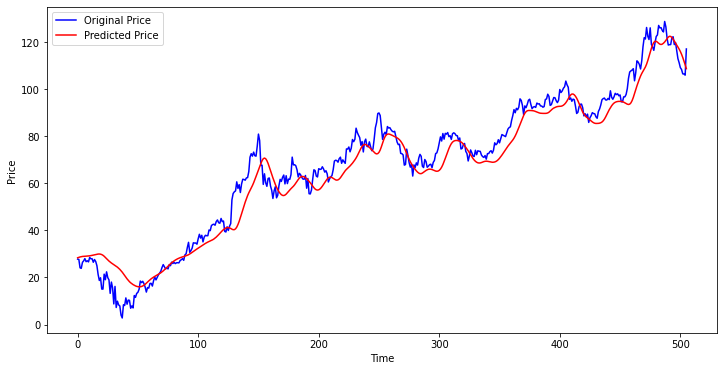

In [193]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label ='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# # compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# # train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # evaluate the model
# loss, mae = model.evaluate(X_test, y_test, verbose=0)
# print('Mean Absolute Error:', mae)

# # make predictions
# predictions = model.predict(X_test)